In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.0MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=be196be4df5e87611c6b59791420cb56ee117b0992c67523c49baddb256bbcac
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.6MB/s 
     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=cccc94cf2e11e1d286d6c8363cf6b4a6cc2767de727ef03e58daff090bd9a2be
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/FS_Competitor_Analysis/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/.shortcut-targets-by-id/1dI67RTtEW-SJRhnNRkrF26W-uhDV3Asg/Morgan Stanley Project/FS_Competitor_Analysis


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [ ]:
df_jp_wm = pd.read_json('pretty_jp_tweets_wmanagement.json')

df_gs_wm = pd.read_json('pretty_gs_tweets_wmanagement.json')

df_ms_wm = pd.read_json('pretty_ms_tweets_wmanagement.json')

df_ml_wm = pd.read_json('pretty_ml_tweets_wmanagement.json')



#sample = pd.read_csv('TwitterData.csv')



In [ ]:
df_jp_wm = df_jp_wm.assign(company = "JPM")

In [ ]:
df_gs_wm = df_gs_wm.assign(company = "GS")

In [ ]:
df_ml_wm = df_ml_wm.assign(company = "ML")

In [ ]:
df_ms_wm = df_gs_wm.assign(company = "MS")

In [ ]:
df_all_wm = pd.concat([df_jp_wm,df_gs_wm,df_ml_wm,df_ms_wm])

In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment = df_all_wm['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
#Inserting the sentiment into the dataframe
df_all_wm = pd.concat([df_all_wm, sentiment.apply(pd.Series)],1)

In [ ]:
df_all_wm.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound
0,False,"[WealthManagement, BlackThursday, historic]",[],False,False,1,[https://twitter.com/business/status/123903561...,,0,[],0,EndlawPaarth,Interesting Read: @jpmorgan's e-trading platfo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-15 04:04:51,2020-03-15 04:04:51,1239039832644390912,/EndlawPaarth/status/1239039832644390913,2236368122,Paarth Endlaw,,JPM,0.126,0.720,0.154,0.2732
1,True,"[trading, Asia, brokerage, JPMorgan, CoronaVir...",[https://pbs.twimg.com/media/ESpoU5fXkAAYdDM.jpg],True,False,18,[https://www.bloomberg.com/news/articles/2020-...,,2,[],13,UrsBolt,Stuck-at-home millionaires boost #trading at p...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-09 07:24:32,2020-03-09 07:24:32,1236915759479164928,/UrsBolt/status/1236915759479164928,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.947,0.053,0.2144
2,True,"[JPMorgan, wealth, technology, banking, Wealth...",[https://pbs.twimg.com/media/ER3m8FjXUAEWmwd.jpg],False,False,9,[https://www.barrons.com/articles/how-jpmorgan...,,0,[],8,UrsBolt,How #JPMorgan Chase plans to grow Its #wealth ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-28 14:17:27,2020-02-28 14:17:27,1233395795325587456,/UrsBolt/status/1233395795325587457,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.829,0.171,0.7152
3,False,"[WealthManagement, BlackThursday, historic]",[],False,False,1,[https://twitter.com/business/status/123903561...,,0,[],0,EndlawPaarth,Interesting Read: @jpmorgan's e-trading platfo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-15 04:04:51,2020-03-15 04:04:51,1239039832644390912,/EndlawPaarth/status/1239039832644390913,2236368122,Paarth Endlaw,,JPM,0.126,0.720,0.154,0.2732
4,True,"[trading, Asia, brokerage, JPMorgan, CoronaVir...",[https://pbs.twimg.com/media/ESpoU5fXkAAYdDM.jpg],True,False,18,[https://www.bloomberg.com/news/articles/2020-...,,2,[],13,UrsBolt,Stuck-at-home millionaires boost #trading at p...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-09 07:24:32,2020-03-09 07:24:32,1236915759479164928,/UrsBolt/status/1236915759479164928,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.947,0.053,0.2144
5,True,"[JPMorgan, wealth, technology, banking, Wealth...",[https://pbs.twimg.com/media/ER3m8FjXUAEWmwd.jpg],False,False,9,[https://www.barrons.com/articles/how-jpmorgan...,,0,[],8,UrsBolt,How #JPMorgan Chase plans to grow Its #wealth ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-28 14:17:27,2020-02-28 14:17:27,1233395795325587456,/UrsBolt/status/1233395795325587457,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.829,0.171,0.7152
6,False,"[business, Finance, Investment, MakingMoney, M...",[],False,False,0,[https://blog.iammarketingmedia.com/mazda-ditc...,,0,[],0,IAM__Network,IAM Platform Curated Tweet:\n\nMazda ditching ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-08-29 13:49:23,2019-08-29 13:49:23,1167071752247267328,/IAM__Network/status/1167071752247267329,226310002,IAM Platform,,JPM,0.000,0.901,0.099,0.4939
7,True,"[technology, WealthManagement, businessgrowthpic]",[https://pbs.twimg.com/media/ECrCZcFUEAAn0t8.jpg],False,False,2,[https://www.wfs.com/sf-2019],,0,[],0,wfsmedia,San Francisco - September 17th \nWFS is honore...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-08-23 17:46:54,2019-08-23 17:46:54,1164957198432133120,/wfsmedia/status/1164957198432133121,174421394,WFS,,JPM,0.000,0.800,0.200,0.7906
8,False,[wealthmanagement],[],False,False,1,[https://www.bloomberg.com/news/articles/2019-...,,0,[],0,PeterHeywood_,JPMorgan Taps Germany’s Growing Appetite for I...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-29 06:36:45,2019-07-29 06:36:45,1155728853928689664,/PeterHeywood_/status/1155728853928689664,775387195259621376,Peter Heywood,,JPM,0.000,0.855,0.145

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df_all_wm['date'] = df_all_wm['timestamp'].apply(lambda x: x.date())

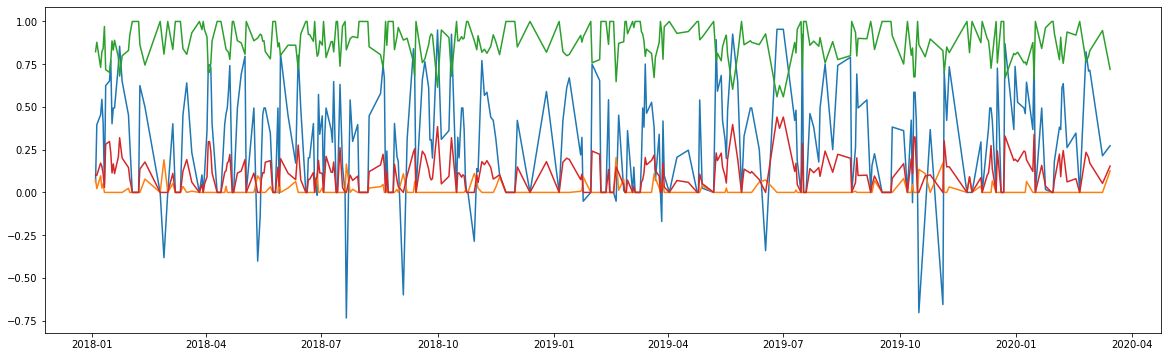

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df_all_wm.groupby('date').mean()['compound'].index, df_all_wm.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df_all_wm.groupby('date').mean()['neg'].index, df_all_wm.groupby('date').mean()['neg'].values)
plt.plot(df_all_wm.groupby('date').mean()['neu'].index, df_all_wm.groupby('date').mean()['neu'].values)
plt.plot(df_all_wm.groupby('date').mean()['pos'].index, df_all_wm.groupby('date').mean()['pos'].values)

In [ ]:
df_wm_sent_jp = df_all_wm[df_all_wm['company'] == 'JPM']
df_wm_sent_jp.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,"[WealthManagement, BlackThursday, historic]",[],False,False,1,[https://twitter.com/business/status/123903561...,,0,[],0,EndlawPaarth,Interesting Read: @jpmorgan's e-trading platfo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-15 04:04:51,2020-03-15 04:04:51,1239039832644390912,/EndlawPaarth/status/1239039832644390913,2236368122,Paarth Endlaw,,JPM,0.126,0.720,0.154,0.2732,2020-03-15
1,True,"[trading, Asia, brokerage, JPMorgan, CoronaVir...",[https://pbs.twimg.com/media/ESpoU5fXkAAYdDM.jpg],True,False,18,[https://www.bloomberg.com/news/articles/2020-...,,2,[],13,UrsBolt,Stuck-at-home millionaires boost #trading at p...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-09 07:24:32,2020-03-09 07:24:32,1236915759479164928,/UrsBolt/status/1236915759479164928,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.947,0.053,0.2144,2020-03-09
2,True,"[JPMorgan, wealth, technology, banking, Wealth...",[https://pbs.twimg.com/media/ER3m8FjXUAEWmwd.jpg],False,False,9,[https://www.barrons.com/articles/how-jpmorgan...,,0,[],8,UrsBolt,How #JPMorgan Chase plans to grow Its #wealth ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-28 14:17:27,2020-02-28 14:17:27,1233395795325587456,/UrsBolt/status/1233395795325587457,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.829,0.171,0.7152,2020-02-28
3,False,"[WealthManagement, BlackThursday, historic]",[],False,False,1,[https://twitter.com/business/status/123903561...,,0,[],0,EndlawPaarth,Interesting Read: @jpmorgan's e-trading platfo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-15 04:04:51,2020-03-15 04:04:51,1239039832644390912,/EndlawPaarth/status/1239039832644390913,2236368122,Paarth Endlaw,,JPM,0.126,0.720,0.154,0.2732,2020-03-15
4,True,"[trading, Asia, brokerage, JPMorgan, CoronaVir...",[https://pbs.twimg.com/media/ESpoU5fXkAAYdDM.jpg],True,False,18,[https://www.bloomberg.com/news/articles/2020-...,,2,[],13,UrsBolt,Stuck-at-home millionaires boost #trading at p...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-03-09 07:24:32,2020-03-09 07:24:32,1236915759479164928,/UrsBolt/status/1236915759479164928,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.947,0.053,0.2144,2020-03-09
5,True,"[JPMorgan, wealth, technology, banking, Wealth...",[https://pbs.twimg.com/media/ER3m8FjXUAEWmwd.jpg],False,False,9,[https://www.barrons.com/articles/how-jpmorgan...,,0,[],8,UrsBolt,How #JPMorgan Chase plans to grow Its #wealth ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-28 14:17:27,2020-02-28 14:17:27,1233395795325587456,/UrsBolt/status/1233395795325587457,875122621,Urs Bolt 🇨🇭,,JPM,0.000,0.829,0.171,0.7152,2020-02-28
6,False,"[business, Finance, Investment, MakingMoney, M...",[],False,False,0,[https://blog.iammarketingmedia.com/mazda-ditc...,,0,[],0,IAM__Network,IAM Platform Curated Tweet:\n\nMazda ditching ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-08-29 13:49:23,2019-08-29 13:49:23,1167071752247267328,/IAM__Network/status/1167071752247267329,226310002,IAM Platform,,JPM,0.000,0.901,0.099,0.4939,2019-08-29
7,True,"[technology, WealthManagement, businessgrowthpic]",[https://pbs.twimg.com/media/ECrCZcFUEAAn0t8.jpg],False,False,2,[https://www.wfs.com/sf-2019],,0,[],0,wfsmedia,San Francisco - September 17th \nWFS is honore...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-08-23 17:46:54,2019-08-23 17:46:54,1164957198432133120,/wfsmedia/status/1164957198432133121,174421394,WFS,,JPM,0.000,0.800,0.200,0.7906,2019-08-23
8,False,[wealthmanagement],[],False,False,1,[https://www.bloomberg.com/news/articles/2019-...,,0,[],0,PeterHeywood_,JPMorgan Taps Germany’s Growing Appetite for I...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-29 06:36:45,2019-07-29 06:36:45,1155728853928689664,/Pet

In [ ]:
df_wm_sent_ms = df_all_wm[df_all_wm['company'] == 'MS']
df_wm_sent_ms.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,True,"[privatebanking, financialservices, wealthmana...",[https://pbs.twimg.com/media/EQ-qxouXsAAcdaf.jpg],False,False,0,[https://www.normanalex.com/2020/02/17/what-an...,,0,[],0,normanalexgroup,Read our new article: WHAT AN AMAZON AND GOLDM...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-17 12:55:52,2020-02-17 12:55:52,1229388998050750464,/normanalexgroup/status/1229388998050750464,63224813,Norman Alex,,MS,0.0,0.920,0.080,0.3470,2020-02-17
1,True,"[privatebanking, financialservices, wealthmana...",[https://pbs.twimg.com/media/EQ-qxouXsAAcdaf.jpg],False,False,0,[https://www.normanalex.com/2020/02/17/what-an...,,0,[],0,normanalexgroup,Read our new article: WHAT AN AMAZON AND GOLDM...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-17 12:55:52,2020-02-17 12:55:52,1229388998050750464,/normanalexgroup/status/1229388998050750464,63224813,Norman Alex,,MS,0.0,0.920,0.080,0.3470,2020-02-17
2,True,[wealthmanagement],[https://pbs.twimg.com/media/DswsmTZXQAAUfNq.jpg],False,False,2,[https://buff.ly/2zo85Gu],,0,[],0,jaypalter,A Goldman Sachs unit hidden in an office park ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-11-24 10:24:03,2018-11-24 10:24:03,1066276249868410880,/jaypalter/status/1066276249868410880,70289799,JAY PALTER,,MS,0.0,1.000,0.000,0.0000,2018-11-24
3,True,[wealthmanagement],[https://pbs.twimg.com/media/DswsmTZXQAAUfNq.jpg],False,False,2,[https://buff.ly/2zo85Gu],,0,[],0,jaypalter,A Goldman Sachs unit hidden in an office park ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-11-24 10:24:03,2018-11-24 10:24:03,1066276249868410880,/jaypalter/status/1066276249868410880,70289799,JAY PALTER,,MS,0.0,1.000,0.000,0.0000,2018-11-24
4,False,"[WBA, GoldmanSachs, WealthManagement, HedgeFunds]",[],False,False,0,[https://bit.ly/2MtixFX],,0,[],0,WBAsia,Goldman Sachs reportedly shuts two Asia-Pacifi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 08:41:00,2018-08-24 08:41:00,1032910634252480512,/WBAsia/status/1032910634252480512,384192468,WealthBriefingAsia,,MS,0.0,1.000,0.000,0.0000,2018-08-24
5,False,"[WBA, GoldmanSachs, WealthManagement, HedgeFunds]",[],False,False,0,[https://bit.ly/2MtixFX],,0,[],0,WBAsia,Goldman Sachs reportedly shuts two Asia-Pacifi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 08:41:00,2018-08-24 08:41:00,1032910634252480512,/WBAsia/status/1032910634252480512,384192468,WealthBriefingAsia,,MS,0.0,1.000,0.000,0.0000,2018-08-24
6,True,"[JPM, earnings, stockmarket, stockreports, ear...",[https://pbs.twimg.com/media/EAGX6bLXkAAZ3BV.jpg],True,False,0,[],,1,[],0,BRTechnicals,Micron was upgraded by Goldman Sachs. Lookout ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-22 18:23:35,2019-07-22 18:23:35,1153370016580014080,/BRTechnicals/status/1153370016580014080,902743784303165440,BR Technicals,,MS,0.0,0.896,0.104,0.5411,2019-07-22
7,True,"[WealthManagement, FundIntelligencepic]",[https://pbs.twimg.com/media/EAFZcDUW4AEAy3v.png],False,False,0,[http://bit.ly/2Z8KAgg],,0,[],0,fund_intel,Senior departures underway at United Capital a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-22 13:50:37,2019-07-22 13:50:37,1153301322260779008,/fund_intel/status/1153301322260779008,361386716,Fund Intelligence,,MS,0.0,0.843,0.157,0.4215,2019-07-22
8,True,"[WealthManagement, FundIntelligencepic]",[https://pbs.twimg.com/media/EAFZbmoWwAIOsWB.png],False,False,0,[http://bit.ly/2Z0Zu8e],,0,[],0,PrivateAssetMgt,Senior departures underway at United Capital a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-22 13:50:35,2019-07-22 13:50:35,1153301315671482368,/PrivateAssetMgt/status/1153301315671482368,573909111,Private Asset Mgt.,,MS,0.0,0.843,0.157,0.4215,2019-07-2

In [ ]:
df_wm_sent_ml = df_all_wm[df_all_wm['company'] == 'ML']
df_wm_sent_ml.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,"[brokerages, WealthManagement]",[],False,False,0,[https://www.financialadvisoriq.com/c/2550453/...,,0,[],0,lorenfox7,Merrill Lynch cuts commissions and expands zer...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-21 16:36:18,2019-10-21 16:36:18,1186320313086349312,/lorenfox7/status/1186320313086349313,3959338444,Loren Fox,,ML,0.22,0.650,0.130,-0.5423,2019-10-21
1,False,"[brokerages, WealthManagement]",[],False,False,0,[https://www.financialadvisoriq.com/c/2550453/...,,0,[],0,lorenfox7,Merrill Lynch cuts commissions and expands zer...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-21 16:36:18,2019-10-21 16:36:18,1186320313086349312,/lorenfox7/status/1186320313086349313,3959338444,Loren Fox,,ML,0.22,0.650,0.130,-0.5423,2019-10-21
2,False,"[Add, healthinsurance, Households, insurancene...",[],False,False,0,[https://www.lifeinsuranceupdater.com/merrill-...,,0,[],0,haiyencutelam,"Merrill Lynch on Track to Add 47,000 Household...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-06-12 23:08:05,2019-06-12 23:08:05,1138946098393964544,/haiyencutelam/status/1138946098393964544,1059122865218277376,Hai Yen,,ML,0.00,1.000,0.000,0.0000,2019-06-12
3,False,"[Add, healthinsurance, Households, insurancene...",[],False,False,0,[https://www.lifeinsuranceupdater.com/merrill-...,,0,[],0,haiyencutelam,"Merrill Lynch on Track to Add 47,000 Household...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-06-12 23:08:05,2019-06-12 23:08:05,1138946098393964544,/haiyencutelam/status/1138946098393964544,1059122865218277376,Hai Yen,,ML,0.00,1.000,0.000,0.0000,2019-06-12
4,False,"[AssetManagement, WealthManagement, MutualFunds]",[],False,False,1,[http://financialadvisoriq.com/c/2100953/24815...,,0,[],1,lorenfox7,Financial Advisor IQ - How Merrill Lynch and E...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-10-10 19:24:05,2018-10-10 19:24:05,1050104702904520704,/lorenfox7/status/1050104702904520707,3959338444,Loren Fox,,ML,0.00,0.906,0.094,0.3612,2018-10-10
5,False,"[wealthmanagement, advisors]",[],False,False,2,[https://www.wealthmanagement.com/technology/i...,,0,[],0,Mike_Thrasher,"iCapital will be managing the ""behind-the-scen...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-19 17:17:56,2018-09-19 17:17:56,1042462810826059776,/Mike_Thrasher/status/1042462810826059776,2479109924,Michael Thrasher,,ML,0.00,0.759,0.241,0.6597,2018-09-19
6,False,"[merrill, investing, wealthmanagement]",[],False,False,0,[https://lnkd.in/eQHJ7Dp],,0,[],0,michaelvrlaku,#merrill #investing #wealthmanagement https://...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-14 12:58:56,2018-09-14 12:58:56,1040585690298429440,/michaelvrlaku/status/1040585690298429441,106200344,michaelvrlaku,,ML,0.00,1.000,0.000,0.0000,2018-09-14
7,False,"[AssetManagement, WealthManagement, MutualFunds]",[],False,False,1,[http://financialadvisoriq.com/c/2100953/24815...,,0,[],1,lorenfox7,Financial Advisor IQ - How Merrill Lynch and E...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-10-10 19:24:05,2018-10-10 19:24:05,1050104702904520704,/lorenfox7/status/1050104702904520707,3959338444,Loren Fox,,ML,0.00,0.906,0.094,0.3612,2018-10-10
8,False,"[wealthmanagement, advisors]",[],False,False,2,[https://www.wealthmanagement.com/technology/i...,,0,[],0,Mike_Thrasher,"iCapital will be managing the ""behind-the-scen...","<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-19 17:17:56,2018-09-19 17:17:56,1042462810826059776,/Mike_Thrasher/status/1042462810826059776,2479109924,Michael Thrasher,,ML,0.00,0.759,0.241,0.6597,2018-09-19
9,False,"[merrill, investing, wealthmanagement]",[],False,False,0,[https://lnkd.in/eQHJ7Dp],,0,[],0,michaelvrlaku,#merrill #investing 

In [ ]:
df_wm_sent_gs = df_all_wm[df_all_wm['company'] == 'GS']
df_wm_sent_gs.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,True,"[privatebanking, financialservices, wealthmana...",[https://pbs.twimg.com/media/EQ-qxouXsAAcdaf.jpg],False,False,0,[https://www.normanalex.com/2020/02/17/what-an...,,0,[],0,normanalexgroup,Read our new article: WHAT AN AMAZON AND GOLDM...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-17 12:55:52,2020-02-17 12:55:52,1229388998050750464,/normanalexgroup/status/1229388998050750464,63224813,Norman Alex,,GS,0.0,0.920,0.080,0.3470,2020-02-17
1,True,"[privatebanking, financialservices, wealthmana...",[https://pbs.twimg.com/media/EQ-qxouXsAAcdaf.jpg],False,False,0,[https://www.normanalex.com/2020/02/17/what-an...,,0,[],0,normanalexgroup,Read our new article: WHAT AN AMAZON AND GOLDM...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-17 12:55:52,2020-02-17 12:55:52,1229388998050750464,/normanalexgroup/status/1229388998050750464,63224813,Norman Alex,,GS,0.0,0.920,0.080,0.3470,2020-02-17
2,True,[wealthmanagement],[https://pbs.twimg.com/media/DswsmTZXQAAUfNq.jpg],False,False,2,[https://buff.ly/2zo85Gu],,0,[],0,jaypalter,A Goldman Sachs unit hidden in an office park ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-11-24 10:24:03,2018-11-24 10:24:03,1066276249868410880,/jaypalter/status/1066276249868410880,70289799,JAY PALTER,,GS,0.0,1.000,0.000,0.0000,2018-11-24
3,True,[wealthmanagement],[https://pbs.twimg.com/media/DswsmTZXQAAUfNq.jpg],False,False,2,[https://buff.ly/2zo85Gu],,0,[],0,jaypalter,A Goldman Sachs unit hidden in an office park ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-11-24 10:24:03,2018-11-24 10:24:03,1066276249868410880,/jaypalter/status/1066276249868410880,70289799,JAY PALTER,,GS,0.0,1.000,0.000,0.0000,2018-11-24
4,False,"[WBA, GoldmanSachs, WealthManagement, HedgeFunds]",[],False,False,0,[https://bit.ly/2MtixFX],,0,[],0,WBAsia,Goldman Sachs reportedly shuts two Asia-Pacifi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 08:41:00,2018-08-24 08:41:00,1032910634252480512,/WBAsia/status/1032910634252480512,384192468,WealthBriefingAsia,,GS,0.0,1.000,0.000,0.0000,2018-08-24
5,False,"[WBA, GoldmanSachs, WealthManagement, HedgeFunds]",[],False,False,0,[https://bit.ly/2MtixFX],,0,[],0,WBAsia,Goldman Sachs reportedly shuts two Asia-Pacifi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-08-24 08:41:00,2018-08-24 08:41:00,1032910634252480512,/WBAsia/status/1032910634252480512,384192468,WealthBriefingAsia,,GS,0.0,1.000,0.000,0.0000,2018-08-24
6,True,"[JPM, earnings, stockmarket, stockreports, ear...",[https://pbs.twimg.com/media/EAGX6bLXkAAZ3BV.jpg],True,False,0,[],,1,[],0,BRTechnicals,Micron was upgraded by Goldman Sachs. Lookout ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-22 18:23:35,2019-07-22 18:23:35,1153370016580014080,/BRTechnicals/status/1153370016580014080,902743784303165440,BR Technicals,,GS,0.0,0.896,0.104,0.5411,2019-07-22
7,True,"[WealthManagement, FundIntelligencepic]",[https://pbs.twimg.com/media/EAFZcDUW4AEAy3v.png],False,False,0,[http://bit.ly/2Z8KAgg],,0,[],0,fund_intel,Senior departures underway at United Capital a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-22 13:50:37,2019-07-22 13:50:37,1153301322260779008,/fund_intel/status/1153301322260779008,361386716,Fund Intelligence,,GS,0.0,0.843,0.157,0.4215,2019-07-22
8,True,"[WealthManagement, FundIntelligencepic]",[https://pbs.twimg.com/media/EAFZbmoWwAIOsWB.png],False,False,0,[http://bit.ly/2Z0Zu8e],,0,[],0,PrivateAssetMgt,Senior departures underway at United Capital a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-07-22 13:50:35,2019-07-22 13:50:35,1153301315671482368,/PrivateAssetMgt/status/1153301315671482368,573909111,Private Asset Mgt.,,GS,0.0,0.843,0.157,0.4215,2019-07-2

In [ ]:
df_wm_sent_gs.mean()['compound'], df_wm_sent_gs.mean()['neg'], df_wm_sent_gs.mean()['neu'], df_wm_sent_gs.mean()['pos']


(0.2713617021276589,
 0.01005471124620061,
 0.9018419452887535,
 0.08807902735562302)

In [ ]:

df_all_wm_com = df_all_wm.groupby('company')['compound'].mean()
df_all_wm_neu = df_all_wm.groupby('company')['neu'].mean()
df_all_wm_neg = df_all_wm.groupby('company')['neg'].mean()
df_all_wm_pos = df_all_wm.groupby('company')['pos'].mean()


# Grouped bar plot with seaborn
import seaborn as sns



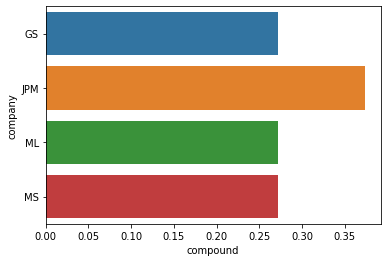

In [ ]:
df_all_wm_com = pd.DataFrame(df_all_wm_com)
df_all_wm_com = df_all_wm_com.reset_index()
sns.barplot(y='company',x='compound',data=df_all_wm_com)

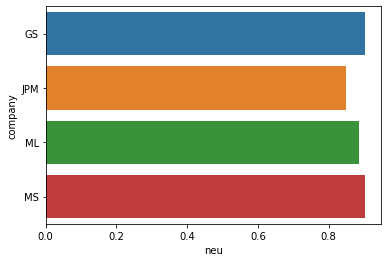

In [ ]:
df_all_wm_neu = pd.DataFrame(df_all_wm_neu)
df_all_wm_neu = df_all_wm_neu.reset_index()
sns.barplot(y='company',x='neu',data=df_all_wm_neu)

In [ ]:
df_all_wm_neg = pd.DataFrame(df_all_wm_neg)
df_all_wm_neg = df_all_wm_neg.reset_index()
sns.barplot(y='company',x='neg',data=df_all_wm_neg)

NameError: ignored

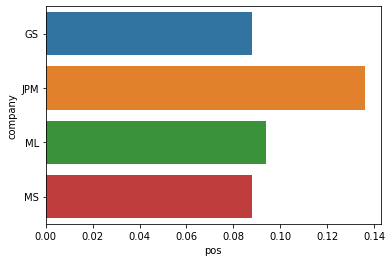

In [ ]:
df_all_wm_pos = pd.DataFrame(df_all_wm_pos)
df_all_wm_pos = df_all_wm_pos.reset_index()
sns.barplot(y='company',x='pos',data=df_all_wm_pos)